In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\wine+quality\winequality-red.csv",sep=";")

In [3]:

df=df.drop_duplicates()

In [4]:
X=df.iloc[:,:-1]

In [5]:
Y=df["quality"]

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.33)

In [7]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [8]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [9]:
y_pred=model.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5077951002227171

In [11]:
grid_param={

    "criterion":['gini','entropy'],
    "max_depth": range(2,32,1),
    "min_samples_leaf": range(1,10,1),
    "min_samples_split": range(2,10,1),
    "splitter":["best","random"]
}

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=model,param_grid=grid_param,cv=5)


In [13]:
grid_search.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 9,
 'splitter': 'random'}

In [ ]:
model_with_best_para=DecisionTreeClassifier(criterion='gini',max_depth= 4,min_samples_leaf= 6,min_samples_split= 9,splitter= 'random')

In [ ]:
model_with_best_para.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=9,
                       splitter='random')

In [ ]:
y_prednew=model_with_best_para.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_prednew)

0.5233853006681515

[Text(0.49779605263157894, 0.9705882352941176, 'x[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.22875, 0.9117647058823529, 'x[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.11921052631578948, 0.8529411764705882, 'x[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.06006578947368421, 0.7941176470588235, 'x[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.021052631578947368, 0.7352941176470589, 'x[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.008421052631578947, 0.6764705882352942, 'x[10] <= 9.125\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.004210526315789474, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.01263157894736842, 0.6176470588235294, 'x[5] <= 21.5\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.008421052631578947, 

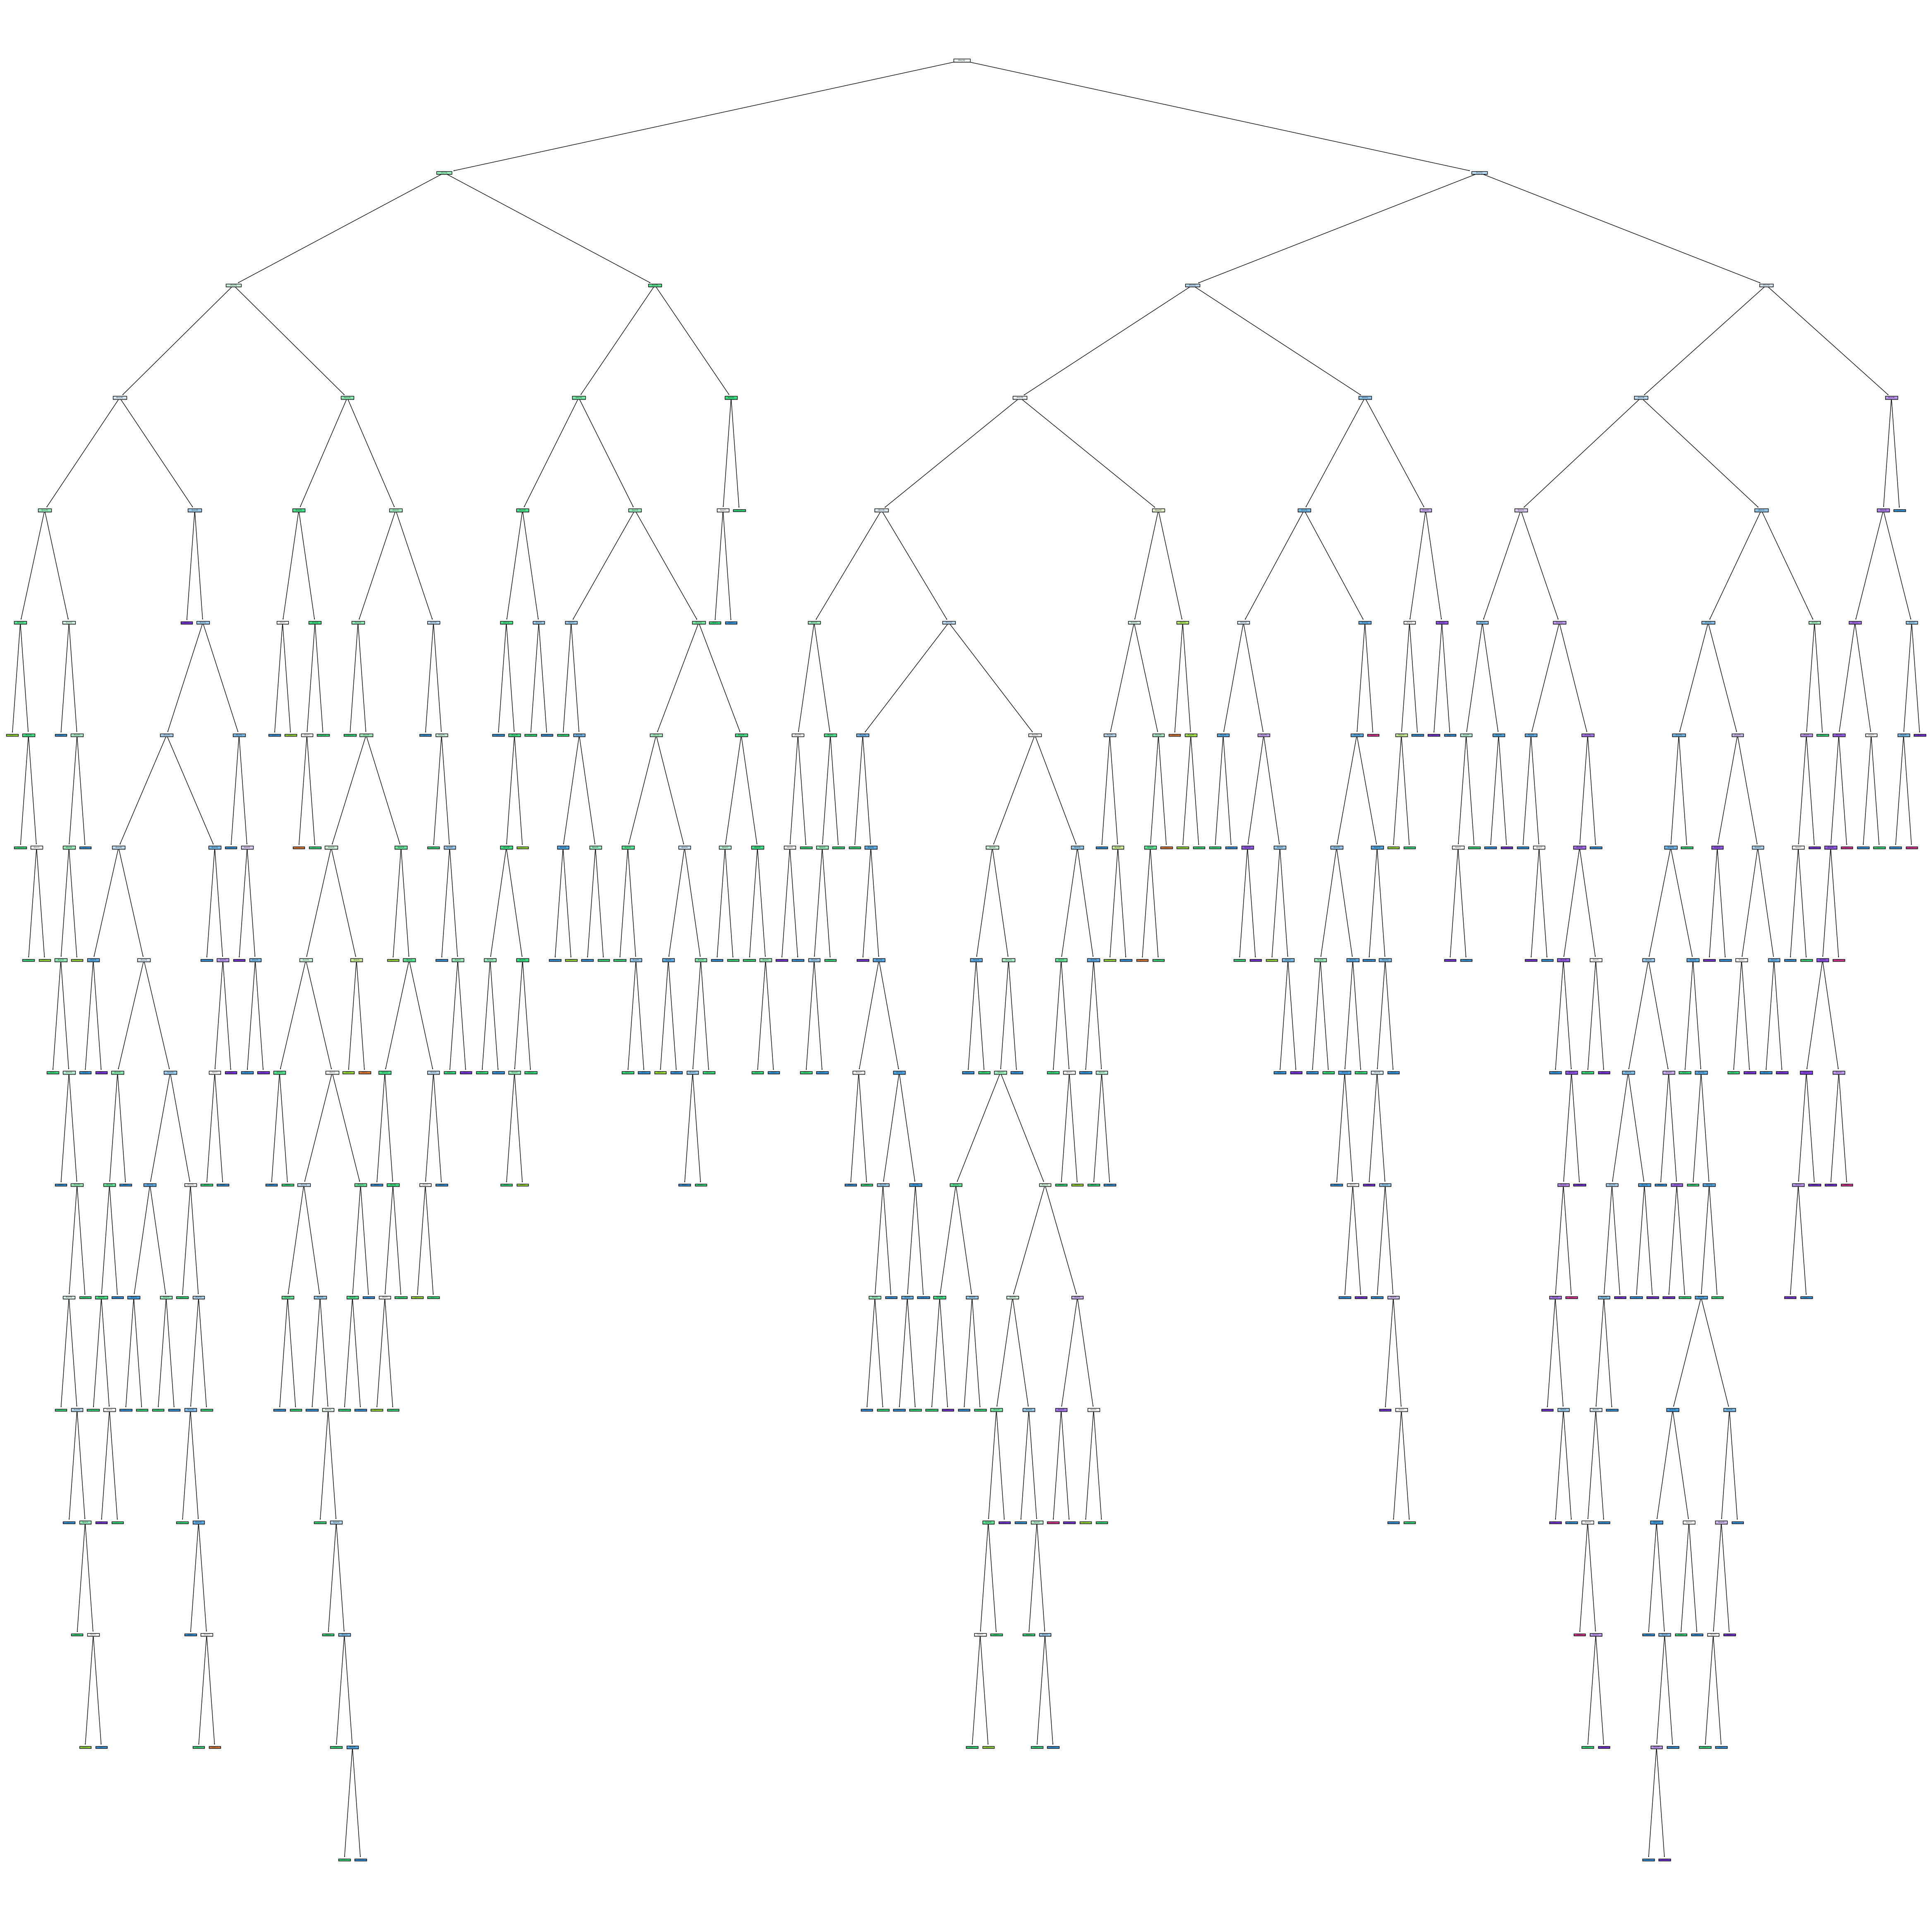

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(60,60))
tree.plot_tree(model,filled=True)

###random forest implementation

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()

In [ ]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rf_pred=rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,rf_pred)

0.6035634743875279

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_searh=GridSearchCV(estimator=rf_model,param_grid=grid_param,cv=3,verbose=2,n_jobs=-1)

In [ ]:
grid_searh.fit(x_train,y_train)

Fitting 3 folds for each of 20736 candidates, totalling 62208 fits


KeyboardInterrupt: 

In [ ]:
Rf_model_with_best_params=RandomForestClassifier(criterion='gini',max_depth= 14,max_features= 'log2',min_samples_leaf= 1,min_samples_split= 2,n_estimators=115)

In [ ]:
Rf_model_with_best_params.fit(x_train,y_train)

RandomForestClassifier(max_depth=14, max_features='log2', n_estimators=115)

In [ ]:
y_pred_bp=Rf_model_with_best_params.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_bp,y_test)

0.6080178173719376

In [ ]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\wine+quality\winequality-red.csv",sep=";")